# In the Name of Allah
## Author:-Wajiha

In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [27]:
p=Path("./Dataset1/")

dirs = p.glob("*")

# for d in dirs:
#     print(d)

image_data=[]
labels=[]

#Optional
image_paths=[]
label_dict={}
label2pokemon={}
idx=0;

for folder_dir in dirs:
#     print(type(folder_dir))
#     print(type(str(folder_dir)))
#     print(str(folder_dir).split("\\")[-1])
    label=str(folder_dir).split("\\")[-1]
    
    if label not in label_dict.keys():
        label_dict[label]=idx;
        label2pokemon[idx]=label
        idx+=1;
        
    
    cnt=0
    print(folder_dir)
    
    #Iterate over folder_dir and pick all images of pokemon
    for img_path in folder_dir.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(40,40))
#         print(img_path)
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])
        cnt+=1
    print(cnt)
    

Dataset1\Abra
41
Dataset1\Aerodactyl
97
Dataset1\Alakazam
48


## Visualizaton

In [28]:
import numpy as np

In [29]:
print(len(image_data))
print(len(labels))

186
186


In [30]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [31]:
X=np.array(image_data)
Y=np.array(labels)

print(X.shape)
print(Y.shape)

(186, 40, 40, 3)
(186,)


In [32]:
#draw some image
def drawImg(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img)
    plt.style.use("seaborn")
    plt.axis("off")
    plt.show()

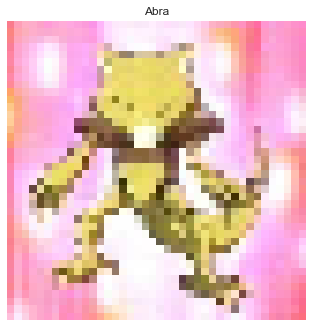

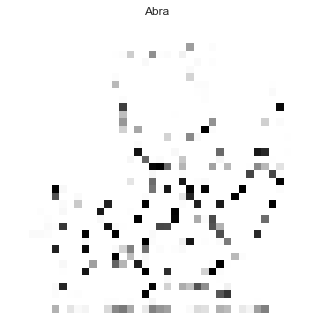

In [33]:
drawImg(X[0]/255.0,Y[0])
drawImg(X[1]/255.0,Y[1])


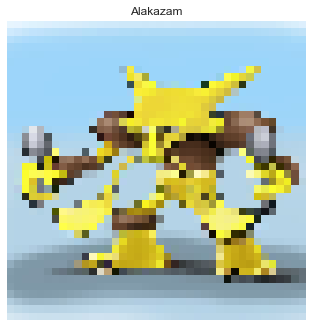

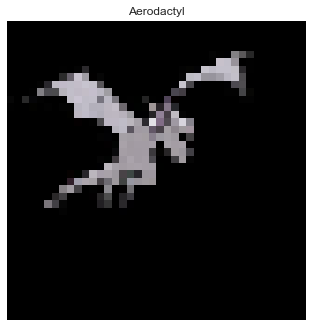

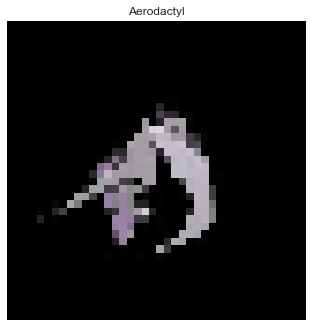

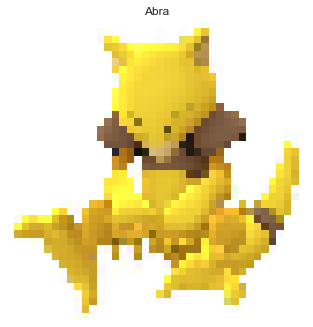

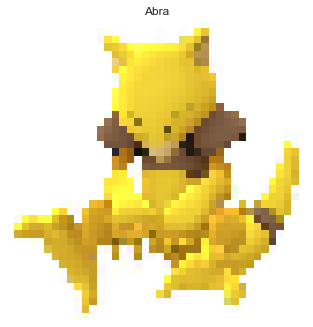

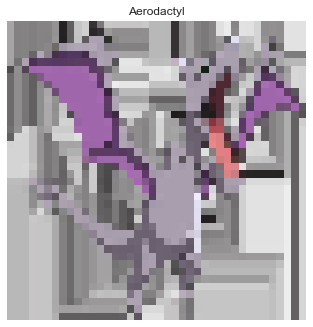

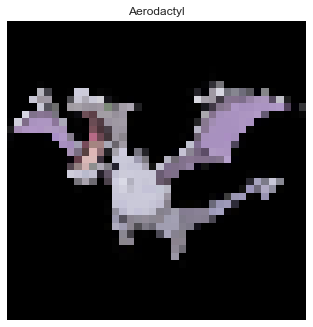

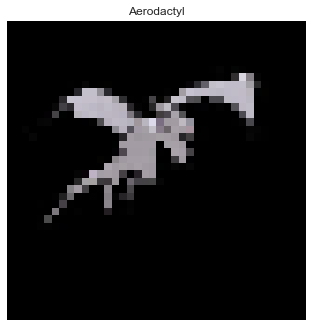

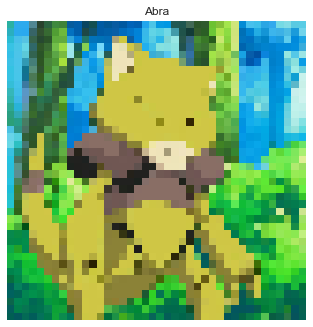

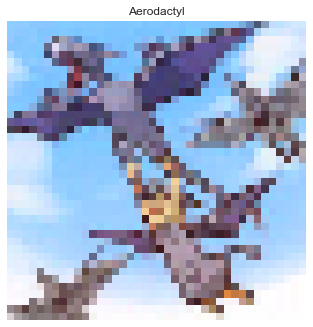

In [34]:
for i in range(10):
    r=np.random.randint(185)
    drawImg(X[r]/255.0,Y[r])

In [35]:
# for i in range(1,20):
#     print(X[i].shape)
#     drawImg(X[i].reshape(40,40,3),Y[i])

# Training

In [45]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/(np.sum(e_pa,axis=1,keepdims=True))
    return ans

In [36]:
## Create Training and Test set

split=int(X.shape[0]*.8)

X_=np.array(X)
Y_=np.array(Y)

#Training set
X=X_[:split,:]
Y=Y_[:split]

#Test Set
XTest=X_[split:,:]
YTest=Y_[split:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(148, 40, 40, 3) (148,)
(38, 40, 40, 3) (38,)


In [46]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={} #Dictionary
        
        #First Layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        
        #Third Layer
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        self.activation_outputs = None
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1= np.dot(x,W1) +b1
        a1= np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        
        W1,W2,W3 =self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        delta3=y_-y
        dw3=np.dot(a2.T,delta3)
        db3=np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T) #derivative of(tanh(a2))
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T) #derivative of tanh(a1)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        #Update the model parameters using gradient descent
        
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 =self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ =self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ", a1.shape)
        
        print("W2 ",W2.shape)
        print("A2 ", a2.shape)
        
        print("W3 ",W3.shape)
        print("Y= ", y_.shape)
        

In [47]:
def loss(y_oht,p): #y_one hot
    l=-np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht


In [48]:
def train(X,Y,model,epochs,learning_rate,logs=True): #logs is for printing the summary
    training_loss=[]
    
    classes=len(np.unique(Y))
    Y_OHT=one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l=loss(Y_OHT,Y_)
        
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
    return training_loss


In [41]:
X=X.reshape(X.shape[0],-1)
print(X.shape)

XTest=XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(148, 4800)
(38, 4800)


In [42]:
print(X.shape)

(148, 4800)


In [49]:
model=NeuralNetwork(input_size=4800,layers=[100,50],output_size=3) #4800 features,(40,40,3)

In [50]:
l=train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.4886
Epoch 50 Loss 0.6362
Epoch 100 Loss 0.4036
Epoch 150 Loss 0.2621
Epoch 200 Loss 0.1812
Epoch 250 Loss 0.1360
Epoch 300 Loss 0.1034
Epoch 350 Loss 0.0812
Epoch 400 Loss 0.0647
Epoch 450 Loss 0.0523


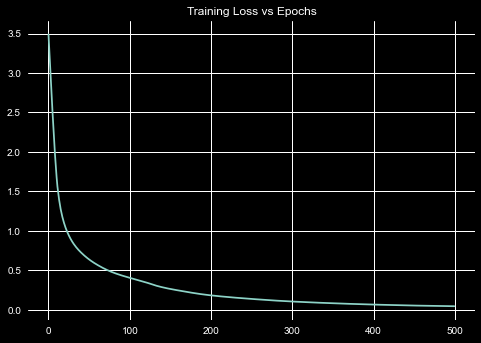

In [51]:
from matplotlib import pyplot as plt
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)
plt.show()

In [67]:
#Accuracy

def getAccuracy(X,Y,model):
    outputs=model.predict(X)
    acc=np.sum(outputs==Y)/Y.shape[0]
    return acc

print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9595
Test Acc 0.0789


In [55]:
from sklearn.metrics import confusion_matrix

In [60]:
from visualize import plot_confusion_matrix

In [61]:
outputs=model.predict(X)
cnf_matrix=confusion_matrix(outputs,Y)
print(cnf_matrix)

[[39  2  1]
 [ 2 95  1]
 [ 0  0  8]]


Confusion matrix, without normalization
[[39  2  1]
 [ 2 95  1]
 [ 0  0  8]]


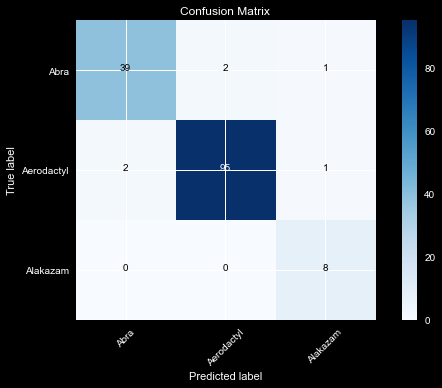

In [63]:
plot_confusion_matrix(cnf_matrix,classes=[label2pokemon[0],label2pokemon[1],label2pokemon[2]],title="Confusion Matrix")

In [53]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.98      0.97      0.97        98
           2       0.80      1.00      0.89         8

    accuracy                           0.96       148
   macro avg       0.91      0.97      0.93       148
weighted avg       0.96      0.96      0.96       148



Test Acc 0.0789
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        20
           2       0.08      1.00      0.15         3

    accuracy                           0.08        38
   macro avg       0.03      0.33      0.05        38
weighted avg       0.01      0.08      0.01        38

Confusion matrix, without normalization
[[ 0  0 15]
 [ 0  0 20]
 [ 0  0  3]]


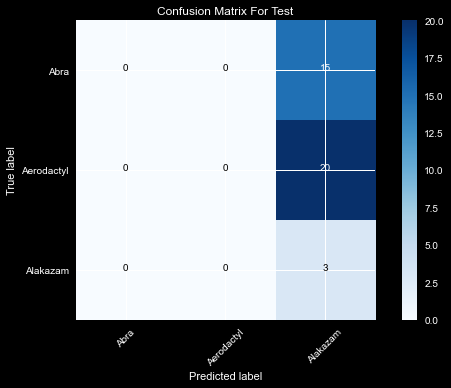

In [68]:
test_outputs=model.predict(XTest)
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))
print(classification_report(test_outputs,YTest))
cnf_matrix=confusion_matrix(test_outputs,YTest)
plot_confusion_matrix(cnf_matrix,classes=[label2pokemon[0],label2pokemon[1],label2pokemon[2]],title="Confusion Matrix For Test")

# Visualize Misclassifications

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


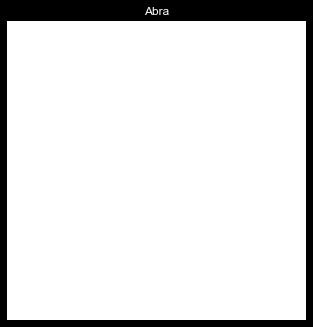

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction 22 Aerodactyl


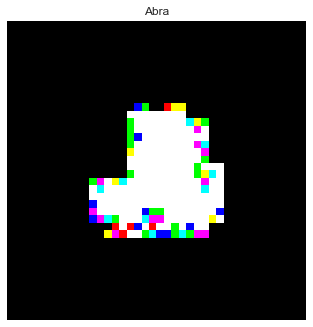

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction 40 Aerodactyl


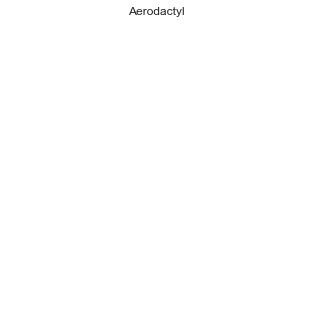

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction 53 Abra


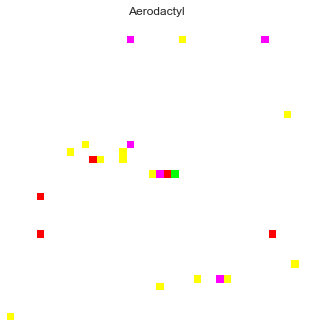

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Prediction 58 Abra


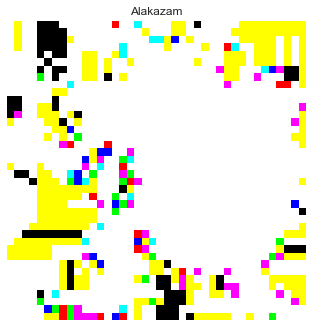

Prediction 138 Aerodactyl


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


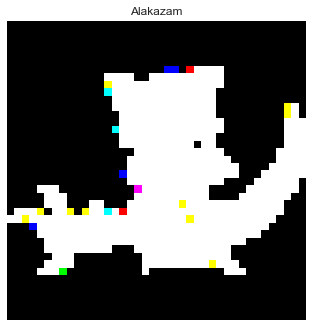

Prediction 147 Abra


In [70]:
for i in range(Y.shape[0]):
    if Y[i]!=outputs[i]:
        drawImg(X[i].reshape(40,40,3),Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))